In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_sales_data.csv')

In [3]:
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [4]:
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


In [5]:
df.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
Date                 object
Salesperson          object
Customer Name        object
Car Make             object
Car Model            object
Car Year             int64
Sale Price           int64
Commission Rate      float64
Commission Earned    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [7]:
#Converting date object datatype to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
Date                 datetime64[ns]
Salesperson          object
Customer Name        object
Car Make             object
Car Model            object
Car Year             int64
Sale Price           int64
Commission Rate      float64
Commission Earned    float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 171.7+ MB


In [9]:
#Assigning Numerical and Categorical columns for better data forecasting in the future
num_dsc_cols = ['Car Year','Sale Price','Commission Rate','Commission Earned','Month','Year']
num_cont_cols = ['Car Year','Month','Year']
categ_cols = ['Salesperson','Customer Name','Car Make','Car Model']

In [10]:
#Checking for skewness
df.skew()

Car Year             0.000789
Sale Price          -0.001285
Commission Rate      0.000489
Commission Earned    0.614310
dtype: float64

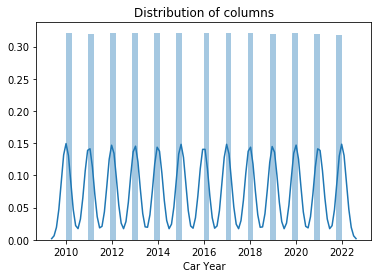

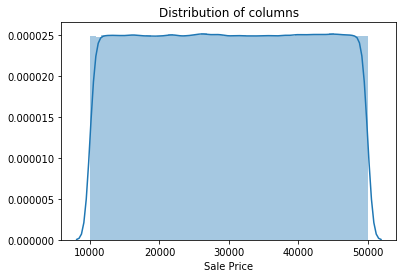

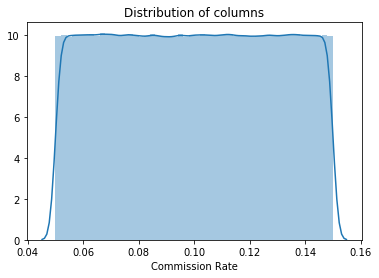

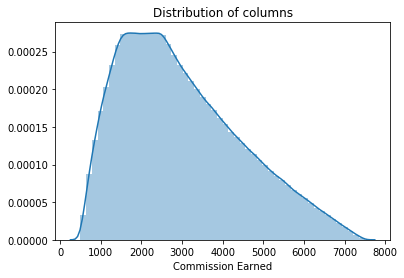

In [11]:
for col in ['Car Year','Sale Price','Commission Rate','Commission Earned']:
    sns.distplot(df[col], kde=True)
    plt.title('Distribution of columns')
    plt.show()

In [12]:
# After analyzing, we can see that the Car year, Sale Price and Commission Rate is overall symmetrical,
# But Commission Earned is slightly positively skewed, cause some higher commissions are increasing the average upward

In [13]:
# Unique Car Make and Car Model
unq_car_makes = df['Car Make'].unique()
unq_car_models = df['Car Model'].unique()
total_car_counts = df['Car Make'].value_counts()

print('Unique Car Make:', unq_car_makes)
print('Unique Car Model:', unq_car_models)
print(total_car_counts)

Unique Car Make: ['Nissan' 'Ford' 'Honda' 'Toyota' 'Chevrolet']
Unique Car Model: ['Altima' 'F-150' 'Civic' 'Silverado' 'Corolla']
Honda        500687
Chevrolet    500455
Toyota       500147
Ford         499781
Nissan       498930
Name: Car Make, dtype: int64


In [14]:
# Correlation matrix
df.corr()

,Car Year,Sale Price,Commission Rate,Commission Earned
Car Year,1.000000,-0.000667,-0.000311,-0.000713
Sale Price,-0.000667,1.000000,0.000474,0.779319
Commission Rate,-0.000311,0.000474,1.000000,0.585176
Commission Earned,-0.000713,0.779319,0.585176,1.000000


In [15]:
# As mentioned earlier, the Commission Earned in the Sale Price is positively skewed.
# Its because as the Sale Price increases, commission increases as well.They have positive correlation.

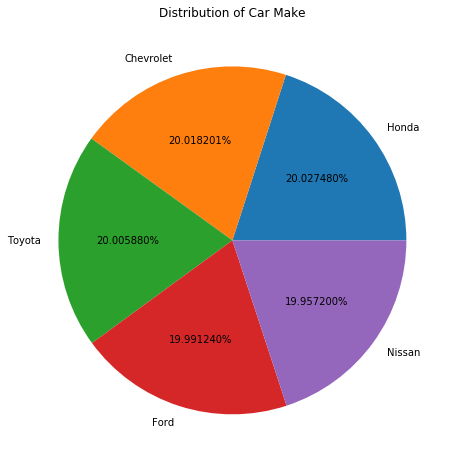

In [16]:
# Creating a pie chart to look at the distribution of Car Make
total_car_counts = df['Car Make'].value_counts()

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(total_car_counts, labels=total_car_counts.index, autopct='%1f%%')
ax.set_title('Distribution of Car Make')
plt.show()

In [17]:
avg_price = df['Sale Price'].mean()
avg_price

30012.178742

In [18]:
avg_car_price = df.groupby('Car Make')['Sale Price'].mean()
avg_car_price

Car Make
Chevrolet    30015.431557
Ford         29994.461240
Honda        30032.532548
Nissan       30016.451923
Toyota       30001.989895
Name: Sale Price, dtype: float64

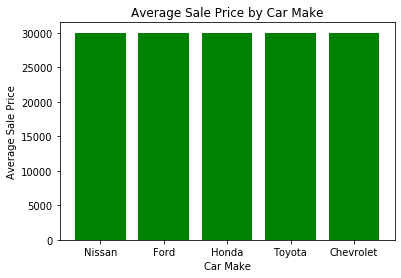

In [19]:
# Creaing a Bar Graph to represent the above averages
plt.bar(range(len(avg_car_price)), avg_car_price, color='green', align='center', label= 'Average Sale Price')
plt.xticks(range(len(avg_car_price)), unq_car_makes)
plt.xlabel('Car Make')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Car Make')
plt.show()

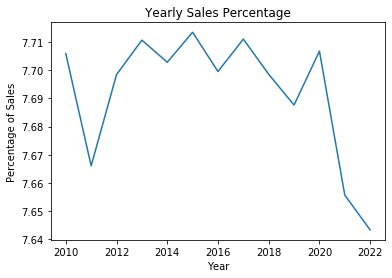

In [20]:
yr_sales = df.groupby('Car Year')['Sale Price'].sum()
# Calculating percantage of sales each year
yr_sales_pct = yr_sales/yr_sales.sum() * 100
# Creating a line chart to show the yearly sales percentage
plt.plot(yr_sales_pct.index, yr_sales_pct.values)
plt.xlabel('Year')
plt.ylabel('Percentage of Sales')
plt.title('Yearly Sales Percentage')
plt.show()

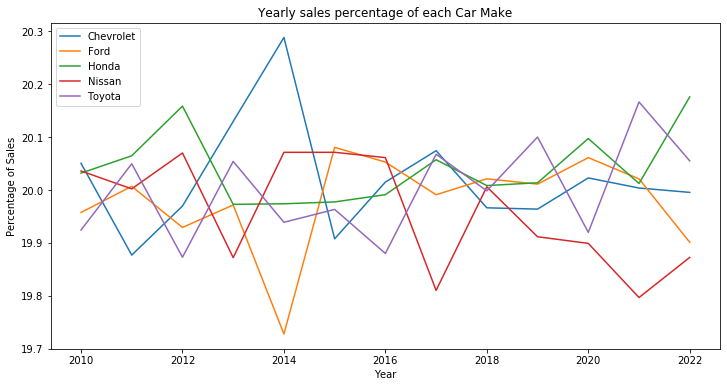

In [21]:
# Group by Car Year and Car Make and calculate the sum of Sale Price
yr_sales = df.groupby(['Car Year', 'Car Make'])['Sale Price'].sum().unstack()

# Calculate the percentage of sales for each year and car make
yr_sales_pct = yr_sales.div(yr_sales.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))

# Create a line chart to visually represent yearly sales percentage of each Car Make
for car_make in yr_sales_pct.columns:
    plt.plot(yr_sales_pct.index, yr_sales_pct[car_make], label=car_make)
plt.xlabel('Year')
plt.ylabel('Percentage of Sales')
plt.title('Yearly sales percentage of each Car Make')
plt.legend()
plt.show()